## Loon inspect
How log-normal IS loon?
### Load LOON

In [38]:
import os
import numpy as np

LOON_GW_DATA_PATH = 'data/loon'
u_flux_ptv = []
u_flux_ntv = []
v_flux_ntv = []
v_flux_ptv = []

BASINS = [
    # 'extra_atl',
    # 'extra_pac',
    # 'indian',
    'SO',
    # 'trop_atl',
    # 'trop_pac',
]

for b in BASINS: 
    f = os.path.join(LOON_GW_DATA_PATH,f'{b}_flights_flux.npy')
    flux = np.load(f)
    u_flux_ntv.append(flux[0])
    u_flux_ptv.append(flux[1])
    v_flux_ntv.append(flux[2])    
    v_flux_ptv.append(flux[3])


loon_ntv_u = np.concatenate(u_flux_ntv)
loon_ptv_u = np.concatenate(u_flux_ptv)
loon_ntv_v = np.concatenate(v_flux_ntv)
loon_ptv_v = np.concatenate(v_flux_ptv)
loon_abs_v = np.concatenate([np.abs(loon_ntv_v)+np.abs(loon_ptv_v)])
loon_abs_u = np.concatenate([np.abs(loon_ntv_u)+np.abs(loon_ptv_u)])
loon_net_u = np.concatenate([loon_ntv_u+loon_ptv_u])
loon_net_v = np.concatenate([loon_ntv_v+loon_ptv_v])

LOON_DATA = {
    'u_flux_ntv': loon_ntv_u[loon_ntv_u<0],
    'u_flux_ptv': loon_ptv_u[loon_ptv_u>0],
    'v_flux_ntv': loon_ntv_v[loon_ntv_v<0],
    'v_flux_ptv': loon_ptv_v[loon_ptv_v>0],
    'u_flux_abs': loon_abs_u[loon_abs_u>0],
    'v_flux_abs': loon_abs_v[loon_abs_v>0],
    'u_flux_net': loon_net_u,
    'v_flux_net': loon_net_v
}

Plot

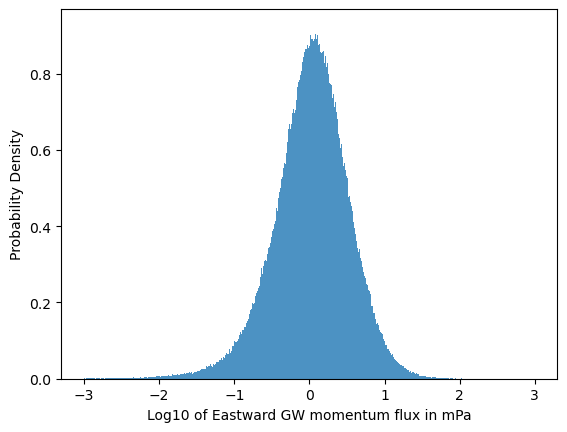

In [39]:
import matplotlib.pyplot as plt
bins = np.linspace(-3,3,1000)
plt.hist(np.log10(LOON_DATA['u_flux_ptv']), bins=bins, alpha=0.8, label='u_flux_ntv',density=True)
plt.xlabel("Log10 of Eastward GW momentum flux in mPa")
plt.ylabel("Probability Density")
print()

Text(0.5, 1.0, 'Loon Eastward GW Momentum Flux (all basins)')

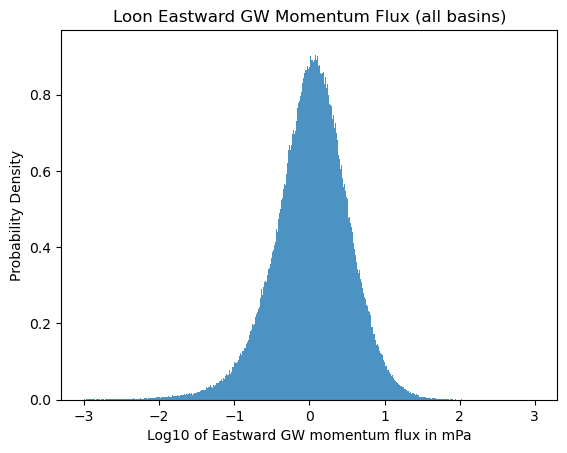

In [40]:
import matplotlib.pyplot as plt
bins = np.linspace(-3,3,1000)
plt.hist(np.log10(LOON_DATA['u_flux_ptv']), bins=bins, alpha=0.8, label='u_flux_ntv',density=True)
plt.xlabel("Log10 of Eastward GW momentum flux in mPa")
plt.ylabel("Probability Density")
plt.title("Loon Eastward GW Momentum Flux (all basins)")

In [41]:
log_mean = np.mean(np.log10(LOON_DATA['u_flux_ptv']))
log_var = np.mean((np.log10(LOON_DATA['u_flux_ptv'])-log_mean)**2)
log_skew = np.mean((np.log10(LOON_DATA['u_flux_ptv'])-log_mean)**3)/log_var**(3/2)
log_exckurt = np.mean((np.log10(LOON_DATA['u_flux_ptv'])-log_mean)**4)/log_var**2 - 3
print(f'log_mean: {log_mean}')
print(f'log_var: {log_var}')
print(f'log_skew: {log_skew}')
print(f'log_exckurt: {log_exckurt}')

log_mean: 0.020429042608007292
log_var: 0.2617917651489919
log_skew: -0.6262736529156625
log_exckurt: 2.4391175113107053


LOG NORMAL

In [42]:
from scipy.stats import lognorm
bins_exp = np.linspace(0,10,1000)
s,loc,scale = lognorm.fit(LOON_DATA['u_flux_ptv'])

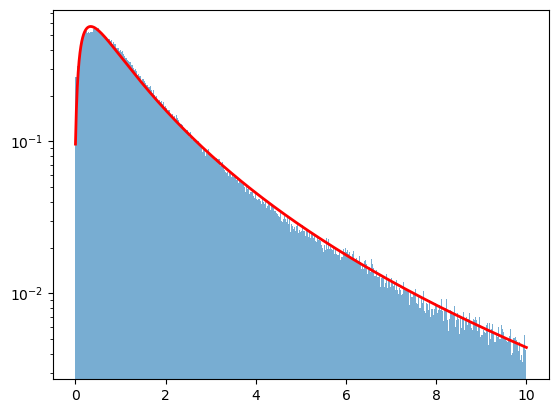

In [43]:
pdf = lognorm.pdf(bins_exp,s,loc=loc,scale=scale)
plt.plot(bins_exp, pdf, 'r-', lw=2, label='lognorm pdf')
plt.hist(LOON_DATA['u_flux_ptv'], bins=bins_exp, density=True,alpha=0.6, label='u_flux_ptv')
plt.yscale('log')

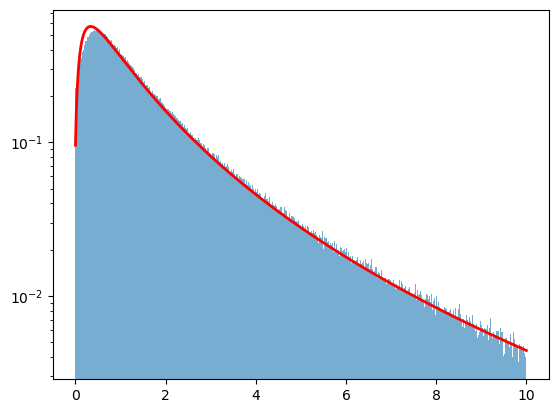

In [44]:
samples_fake = lognorm.rvs(s, loc=loc, scale=scale, size=2_000_000)
samples_fake = samples_fake +  np.random.normal(0, 0.2, size=2_000_000)
samples_fake = samples_fake[samples_fake>0]
plt.plot(bins_exp, pdf, 'r-', lw=2, label='lognorm pdf')
plt.hist(samples_fake, bins=bins_exp, density=True,alpha=0.6, label='u_flux_ptv')
plt.yscale('log')

ABS DISTRIBUTION

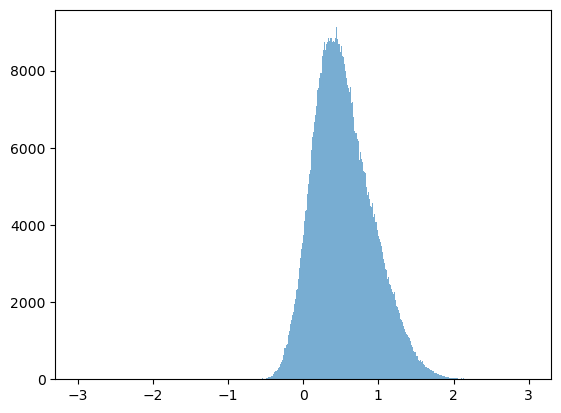

In [45]:
import matplotlib.pyplot as plt
bins = np.linspace(-3,3,1000)
plt.hist(np.log10(LOON_DATA['u_flux_abs']), bins=bins, alpha=0.6, label='u_flux_ntv')
print()

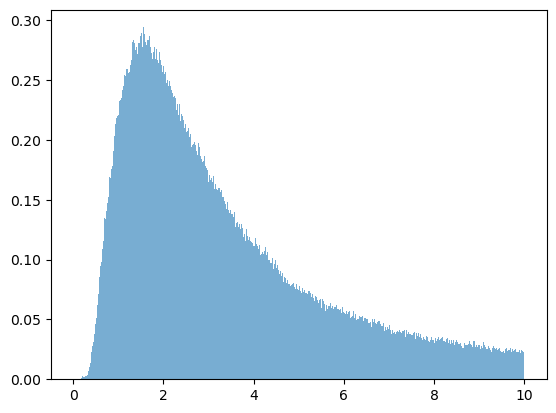

In [46]:
bins_abs = np.linspace(0,10,1000)
plt.hist(LOON_DATA['u_flux_abs'], bins=bins_abs, alpha=0.6, label='u_flux_ntv',density=True)
print()

Mean: 5.52070429970192, Variance: 7.816508043313493, 90th Percentile: 12.010830973378331, 90th Contribution: 40.84988162616919%


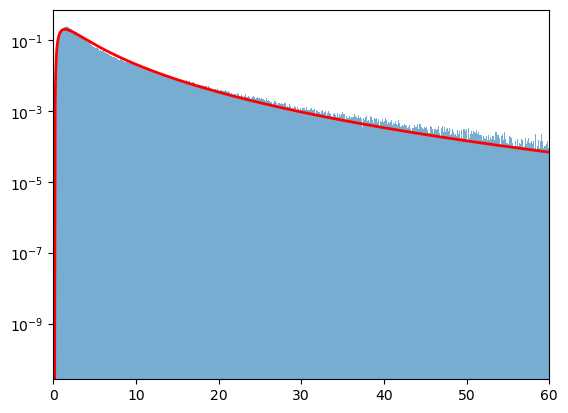

In [47]:
bins_abs = np.linspace(0,60,1000)
s,loc,scale = lognorm.fit(LOON_DATA['u_flux_abs'])

plt.plot(bins_abs, lognorm.pdf(bins_abs, s, loc=loc, scale=scale), 'r-', lw=2, label='lognorm pdf')
plt.hist(LOON_DATA['u_flux_abs'], bins=bins_abs, alpha=0.6, label='u_flux_ntv',density=True)
plt.yscale('log')
plt.xlim(0,60)

mean,var = np.mean(LOON_DATA['u_flux_abs']), np.std(LOON_DATA['u_flux_abs'])
percentile_90 = np.percentile(LOON_DATA['u_flux_abs'], 90)
contribution = np.sum(LOON_DATA['u_flux_abs'][LOON_DATA['u_flux_abs'] > percentile_90]) / np.sum(LOON_DATA['u_flux_abs']) * 100
print(f'Mean: {mean}, Variance: {var}, 90th Percentile: {percentile_90}, 90th Contribution: {contribution}%')

Abs net

Text(0.5, 0, 'Absolute eastwards GW momentum flux in mPa')

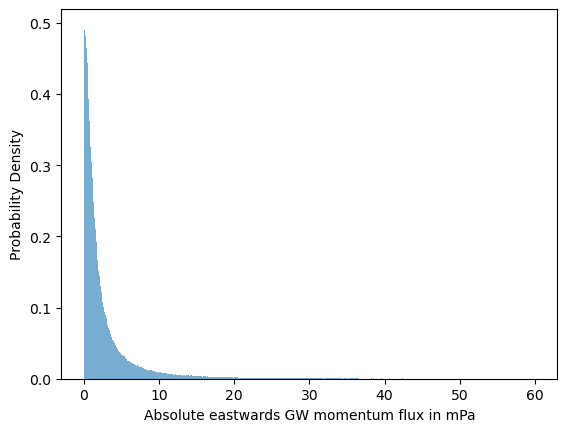

In [50]:
abs_u_net = np.abs(LOON_DATA['u_flux_net'])

plt.hist(abs_u_net,bins=bins_abs,density=True, alpha=0.6, label='u_flux_net')
plt.ylabel("Probability Density")
plt.xlabel("Absolute eastwards GW momentum flux in mPa")

Mean: 3.019731275017825, Variance: 6.063988018175971, 90th Percentile: 6.9640007830421, 90th Contribution: 51.08830556441535%


(0.0, 60.0)

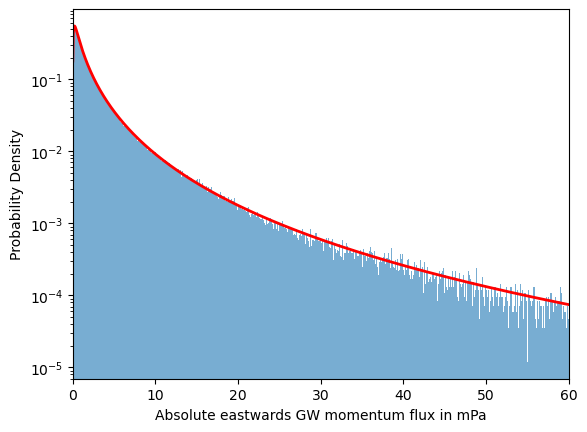

In [53]:
s,loc,scale = lognorm.fit(abs_u_net)

plt.plot(bins_abs, lognorm.pdf(bins_abs, s, loc=loc, scale=scale), 'r-', lw=2, label='lognorm pdf')





plt.hist(abs_u_net,bins=bins_abs,density=True, alpha=0.6, label='u_flux_net')
plt.yscale('log')
plt.ylabel("Probability Density")
plt.xlabel("Absolute eastwards GW momentum flux in mPa")

mean,var = np.mean(abs_u_net), np.std(abs_u_net)
percentile_90 = np.percentile(abs_u_net, 90)
contribution = np.sum(abs_u_net[abs_u_net > percentile_90]) / np.sum(abs_u_net) * 100
print(f'Mean: {mean}, Variance: {var}, 90th Percentile: {percentile_90}, 90th Contribution: {contribution}%')

plt.xlim(0,60)

## log normal sum test 
loon is pretty log normal on a 2 minute interval? What if we MEAN the same distribution 720 times!(~ 1 day - aka ad99 default) 

In [83]:
from scipy.stats import lognorm
N_SAMPLES = 1_000_000
N_CHAIN = 720
a,loc,scale = lognorm.fit(LOON_DATA['u_flux_ptv'])
samples = np.zeros((N_CHAIN,N_SAMPLES))
for i in range(N_CHAIN):
    samples[i] = lognorm.rvs(a, loc=loc, scale=scale, size=N_SAMPLES)

smp = np.mean(samples,axis=0)

(array([3.84691267e-05, 7.69382534e-05, 3.26987577e-04, 1.67340701e-03,
        6.82826999e-03, 2.14273036e-02, 5.62033941e-02, 1.25467057e-01,
        2.43528807e-01, 4.23545085e-01, 6.56052487e-01, 9.19431363e-01,
        1.19238905e+00, 1.43314808e+00, 1.60297004e+00, 1.69585375e+00,
        1.68981409e+00, 1.60008486e+00, 1.45249805e+00, 1.27592476e+00,
        1.08777226e+00, 8.92272159e-01, 7.04388945e-01, 5.58417843e-01,
        4.22044789e-01, 3.18370493e-01, 2.36854413e-01, 1.74322848e-01,
        1.25217007e-01, 8.93060777e-02, 6.42049725e-02, 4.60090755e-02,
        3.18332024e-02, 2.37739203e-02, 1.75419218e-02, 1.18484910e-02,
        7.82846728e-03, 6.78980086e-03, 4.75093715e-03, 2.92365363e-03,
        2.38508586e-03, 1.90422177e-03, 1.44259225e-03, 9.23259041e-04,
        5.57802337e-04, 4.03925830e-04, 6.92444281e-04, 5.57802337e-04,
        2.69283887e-04, 2.69283887e-04, 2.11580197e-04, 5.77036901e-05,
        1.34641943e-04, 1.92345634e-04, 7.69382534e-05, 1.154073

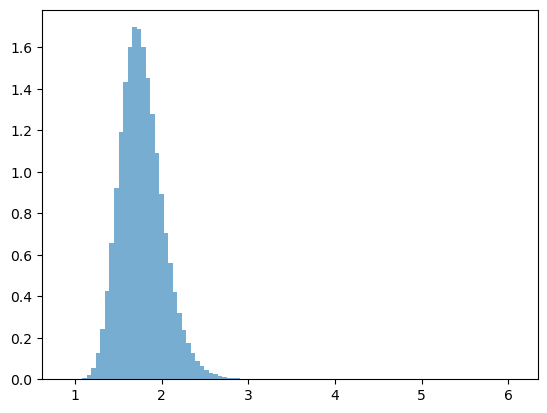

In [82]:
plt.hist(smp, bins=100, density=True,alpha=0.6)
